# Imports


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # can be used to make histogram of the image
import cv2

# Reading Image and Some Analysis

## Reading the Image


I will be reading the image using matplotlib for convenience of display

In [120]:
img_plt = plt.imread(r'images\\image.png')

In [121]:
img_cv2 = cv2.imread(r'images\\image.png')

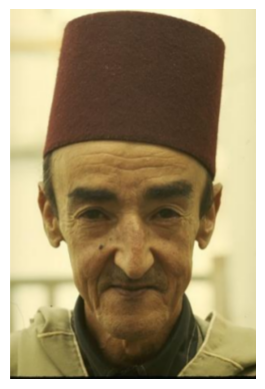

In [122]:
plt.imshow(img_plt)
plt.axis('off')
plt.show()

## Analyzing the Image



RGB Channels of Image

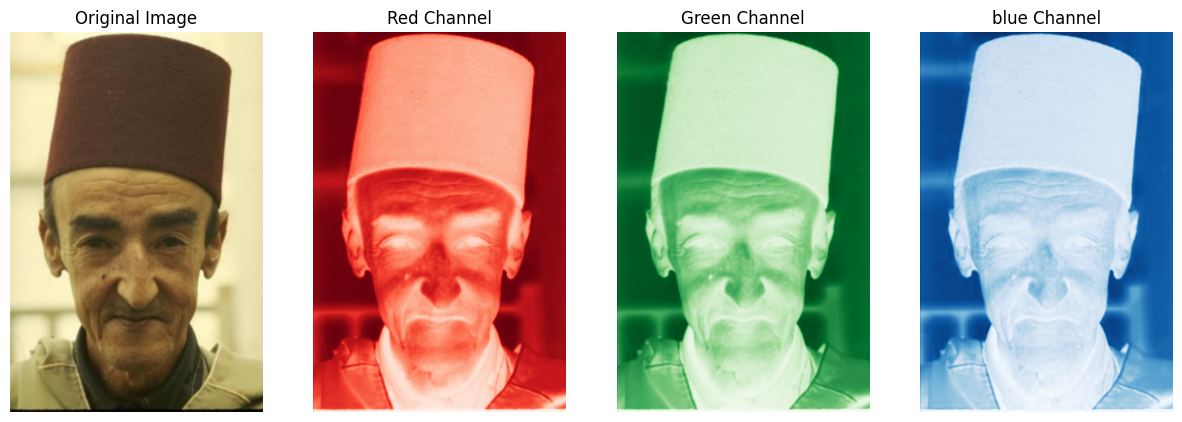

In [123]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_plt)
ax[0].set_title('Original Image')
ax[1].imshow(img_plt[:, :, 0], cmap='Reds') # cmap for visualization
ax[1].set_title('Red Channel')
ax[2].imshow(img_plt[:, :, 1], cmap='Greens')
ax[2].set_title('Green Channel')
ax[3].imshow(img_plt[:, :, 2], cmap='Blues')
ax[3].set_title('blue Channel')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.show()


Histogram of pixel values

Because CV2 reads in the image with the actual pixel intensities, it is better to use it to see the distribution of pixel values beofre normalization t=done by matplotlib.

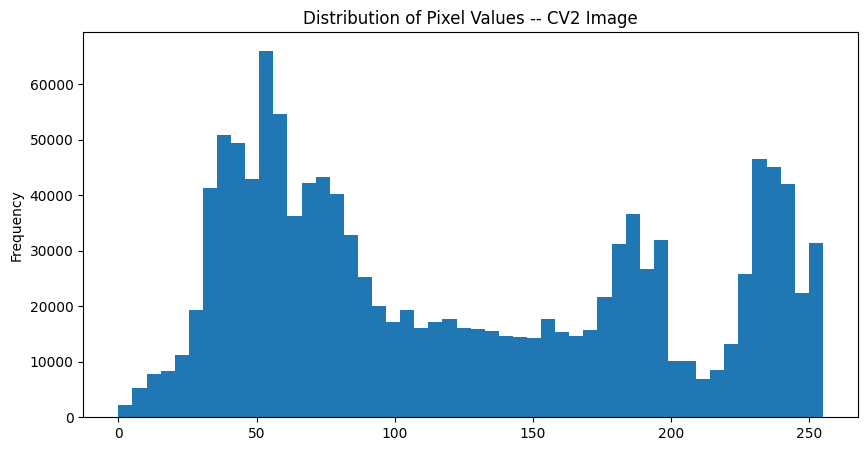

In [124]:
pd.Series(img_cv2.flatten()).plot(kind='hist', bins=50, figsize=(10, 5), title='Distribution of Pixel Values -- CV2 Image')
# flatten() method returns a copy of the array collapsed into one dimension
# pd.Series() method converts the array into a pandas series
plt.show()


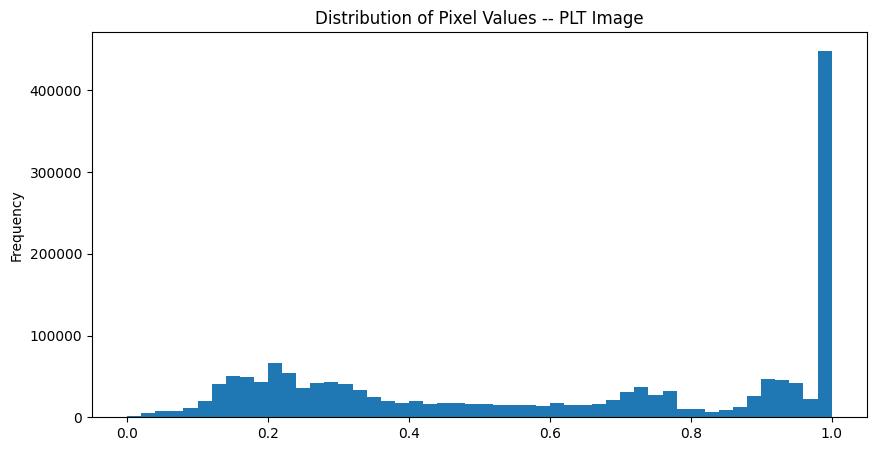

In [125]:
pd.Series(img_plt.flatten()).plot(kind='hist', bins=50, figsize=(10, 5), title='Distribution of Pixel Values -- PLT Image')
plt.show()


In [126]:
print(f"Shape {img_cv2.shape}")
print(f"Size {img_cv2.size}")
print(f"Data type {img_cv2.dtype}") # unsigned integer-- 8 bits
print(f"Max value {img_cv2.max()}")
print(f"Min value {img_cv2.min()}")
print(f"Mean value {img_cv2.mean():.4f}")
print(f"Standard deviation {img_cv2.std():.4f}")

Shape (792, 527, 3)
Size 1252152
Data type uint8
Max value 255
Min value 0
Mean value 124.0233
Standard deviation 74.3784


In [127]:
print(f"Shape {img_plt.shape}") # 4th channel is Alpha channel -- for opacity
print(f"Size {img_plt.size}")
print(f"Data type {img_plt.dtype}") # unsigned integer-- 8 bits
print(f"Max value {img_plt.max()}")
print(f"Min value {img_plt.min()}")
print(f"Mean value {img_plt.mean():.4f}")
print(f"Standard deviation {img_plt.std():.4f}")

Shape (792, 527, 4)
Size 1669536
Data type float32
Max value 1.0
Min value 0.0
Mean value 0.6148
Standard deviation 0.3366


# Filters

## Grayscale

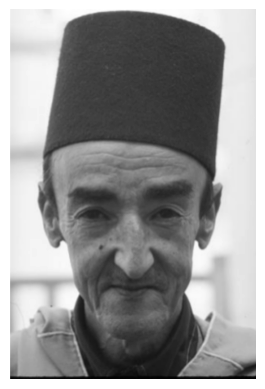

In [128]:
# Convert to grayscale
gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

# Display the image using Matplotlib
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [129]:
print(f"Shape {gray_img.shape}")
print(f"Size {gray_img.size}")
print(f"Data type {gray_img.dtype}") # unsigned integer-- 8 bits
print(f"Max value {gray_img.max()}")
print(f"Min value {gray_img.min()}")
print(f"Mean value {gray_img.mean():.4f}")
print(f"Standard deviation {gray_img.std():.4f}")

Shape (792, 527)
Size 417384
Data type uint8
Max value 249
Min value 3
Mean value 131.9338
Standard deviation 72.4253


## Noise Reduction using Median Filter

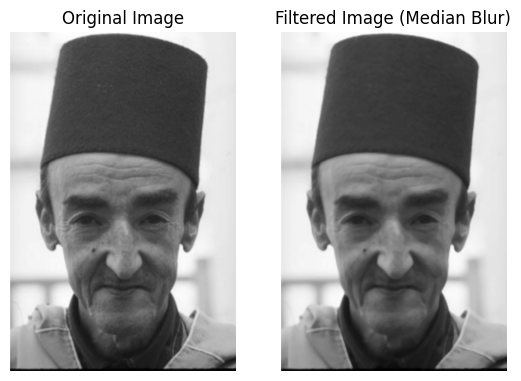

In [182]:
# median
median_img = cv2.medianBlur(gray_img, 7)  # I think its different from pdf 

# Display the images
# original gray image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
#image after median blur
plt.subplot(1, 2, 2)
plt.imshow(median_img, cmap='gray')
plt.title("Filtered Image (Median Blur)")
plt.axis('off')

plt.show()

## Edge Detector using Laplacian Filter

(np.float64(-0.5), np.float64(526.5), np.float64(791.5), np.float64(-0.5))

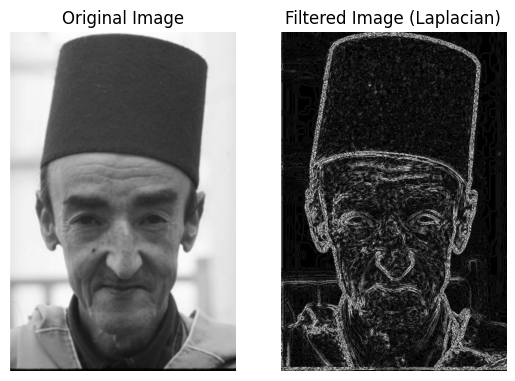

In [183]:
# laplacian
# cv2.Laplacian(src, ddepth, ksize=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

laplacian_img = cv2.Laplacian(median_img , cv2.CV_64F, ksize=5)  # cv2.CV_64F is a signed float64

laplacian_img = np.uint8(np.absolute(laplacian_img)) # convert to unsigned int to display it correctly
# since cv2.imshow() expects uint8 images

# plt.figure(figsize=(10, 5))
# original gray image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
#image after laplacian filter
plt.subplot(1, 2, 2)
plt.imshow(laplacian_img, cmap='gray')
plt.title("Filtered Image (Laplacian)")
plt.axis('off')



## Binary Thresholding

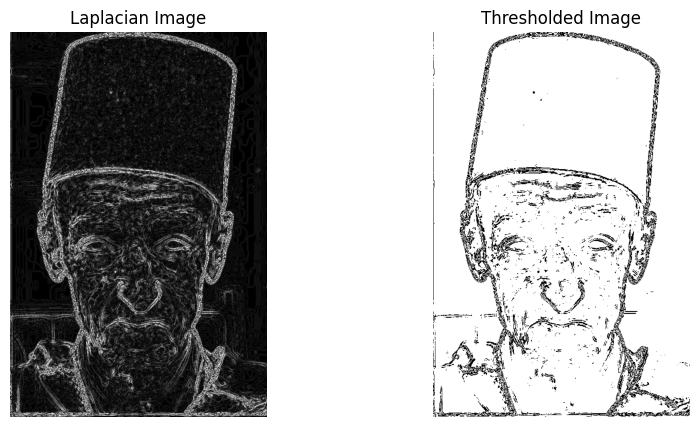

In [184]:
#_, thresh_img = cv2.threshold(src, thresh, maxval, type)
_, thresh_img = cv2.threshold(laplacian_img, 100, 255, cv2.THRESH_BINARY)
thresh_img = cv2.bitwise_not(thresh_img) # invert the image

plt.figure(figsize=(10, 5))
# laplacian image
plt.subplot(1, 2, 1)
plt.imshow(laplacian_img, cmap='gray')
plt.title("Laplacian Image")
plt.axis('off')
#image after thresholding
plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()


## Bilateral Filter

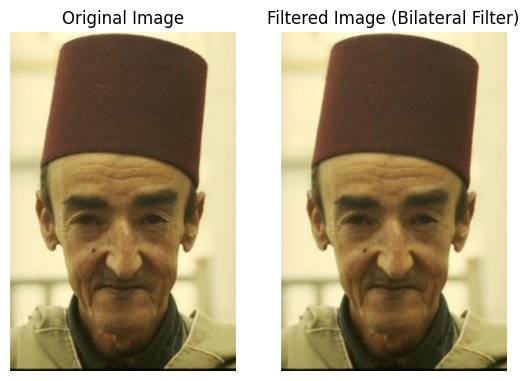

In [193]:
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType=cv2.BORDER_DEFAULT)

# Apply bilateral filter (d=9, sigmaColor=75, sigmaSpace=75)
bilateral_img = cv2.bilateralFilter(img_cv2, 5, 75, 75)

# Display the images
# original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
#image after bilateral filter
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image (Bilateral Filter)")
plt.axis('off')
plt.show()

